In [5]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict
sys.path.append('../src/')
sys.path.append('../eval/')
sys.path.append('../envs/experiment')

In [11]:
import namingConstants as NC
from consistentSignalChecks_Experiment import *
from evaluateOverloadedSignaling_Experiment import *

In [7]:
%load_ext autoreload
%autoreload 2

# Set Up
## Conditions

In [8]:
#condition 1: Joint Planning and No Recursive Reasoning
intentionSpace = ['green triangle', 'green circle', 'purple circle']
signalSpace = ['green', 'circle']

fixedParameters = {NC.WORLDS : [1], NC.DESIRES : [1], NC.INTENTIONS: intentionSpace}
conditionParameters = {'signals': signalSpace, 'targets':intentionSpace, 'Low': ((5,0), (5, 10), ((3,0), (7,0)), ((1,10), (5,6), (9,10)), 10), 'Medium': ((5,0), (5, 10), ((3,0), (7,0)), ((1,10), (5,6), (9,10)), 15), 'High': ((5,0), (5, 10), ((3,0), (7,0)), ((1,10), (5,6), (9,10)), 20)}

In [6]:
#condition 2: Joint Planning and Recursive Reasoning
intentionSpace2 = ['green triangle', 'purple circle', 'green circle']
signalSpace2 = ['green', 'circle']

fixedParameters2 = {NC.WORLDS : [1], NC.DESIRES : [1], NC.INTENTIONS: intentionSpace2}
conditionParameters2 = {'signals': signalSpace2, 'targets':intentionSpace2, 'Low': ((5,0), (5, 10), ((3,0), (7,0)), ((1,10), (5,6), (9,10)), 10), 'Medium': ((5,0), (5, 10), ((3,0), (7,0)), ((1,10), (5,6), (9,10)), 15), 'High': ((5,0), (5, 10), ((3,0), (7,0)), ((1,10), (5,6), (9,10)), 20)}

In [7]:
#condition 3: No Joint Planning and Recursive Reasoning
intentionSpace3 = ['green triangle', 'green circle','purple circle']
signalSpace3 = ['green', 'circle']

fixedParameters3 = {NC.WORLDS : [1], NC.DESIRES : [1], NC.INTENTIONS: intentionSpace3}
conditionParameters3 = {'signals': signalSpace3, 'targets':intentionSpace3, 'Low': ((5,0), (5, 8), ((3,0), (7,0)), ((1,10), (5,10), (9,10)), 10), 'Medium': ((5,0), (5, 8), ((3,0), (7,0)), ((1,10), (5,10), (9,10)), 15), 'High': ((5,0), (5, 8), ((3,0), (7,0)), ((1,10), (5,10), (9,10)), 20)}

In [8]:
#condition 4: No Joint Planning and No Recursive Reasoning
intentionSpace4 = ['green triangle', 'purple circle','green circle']
signalSpace4 = ['purple', 'triangle']

fixedParameters4 = {NC.WORLDS : [1], NC.DESIRES : [1], NC.INTENTIONS: intentionSpace4}
conditionParameters4 = {'signals': signalSpace4, 'targets':intentionSpace4, 'Low': ((5,0), (5, 10), ((3,0), (7,0)), ((1,10), (5,6), (9,10)), 10), 'Medium': ((5,0), (5, 10), ((3,0), (7,0)), ((1,10), (5,6), (9,10)), 15), 'High': ((5,0), (5, 10), ((3,0), (7,0)), ((1,10), (5,6), (9,10)), 20)}

## Variable Grid to Tune Over

In [12]:
manipulatedVariables = OrderedDict()

manipulatedVariables['trueTarget'] = ['green triangle', 'green circle', 'purple circle']
manipulatedVariables['costs'] = ['Low', 'Medium', 'High']
manipulatedVariables['alpha'] = list(np.linspace(0,5,21))
manipulatedVariables['nreps'] = [100]

levelNames = list(manipulatedVariables.keys())
levelValues = list(manipulatedVariables.values())
modelIndex = pd.MultiIndex.from_product(levelValues, names=levelNames)
toSplitFrame = pd.DataFrame(index=modelIndex)

# Condition Evaluation

In [13]:
computeStatistics_JPnoRR =  IWTrialSampler(conditionParameters = conditionParameters, 
                                    fixedParameters=fixedParameters)

computeConditionStatistics_JPnoRR = lambda condition: computeStatistics_JPnoRR(condition.index.get_level_values('trueTarget')[0], condition.index.get_level_values('costs')[0], condition.index.get_level_values('alpha')[0], condition.index.get_level_values('nreps')[0])
experimentCondition_JPnoRR = toSplitFrame.groupby(levelNames).apply(computeConditionStatistics_JPnoRR)

condition alpha 0.0 cost High


KeyboardInterrupt: 

In [12]:
experimentCondition_JPnoRR.to_pickle("./jointPlanningNORecursiveReasoning.pkl")

In [13]:
computeStatistics_JPnoRR.translateCostSchemeToInputs('Low')

{'signalerLocation': (5, 0),
 'receiverLocation': (5, 10),
 'signalDictionary': {(3, 0): 'green', (7, 0): 'circle'},
 'targetDictionary': {(1, 10): 'green triangle',
  (5, 6): 'green circle',
  (9, 10): 'purple circle'},
 'valueOfReward': 10}

In [14]:
computeStatistics_JPRR2 =  IWTrialSampler(conditionParameters = conditionParameters2, 
                                    fixedParameters=fixedParameters2)

computeConditionStatistics_JPRR2 = lambda condition: computeStatistics_JPRR2(condition.index.get_level_values('trueTarget')[0], condition.index.get_level_values('costs')[0], condition.index.get_level_values('alpha')[0], condition.index.get_level_values('nreps')[0])
experimentCondition_JPRR2 = toSplitFrame.groupby(levelNames).apply(computeConditionStatistics_JPRR2)

condition alpha 0.0 cost High
condition alpha 0.25 cost High
condition alpha 0.5 cost High
condition alpha 0.75 cost High
condition alpha 1.0 cost High
condition alpha 1.25 cost High
condition alpha 1.5 cost High
condition alpha 1.75 cost High
condition alpha 2.0 cost High
condition alpha 2.25 cost High
condition alpha 2.5 cost High
condition alpha 2.75 cost High
condition alpha 3.0 cost High
condition alpha 3.25 cost High
condition alpha 3.5 cost High
condition alpha 3.75 cost High
condition alpha 4.0 cost High
condition alpha 4.25 cost High
condition alpha 4.5 cost High
condition alpha 4.75 cost High
condition alpha 5.0 cost High
condition alpha 0.0 cost Low
condition alpha 0.25 cost Low
condition alpha 0.5 cost Low
condition alpha 0.75 cost Low
condition alpha 1.0 cost Low
condition alpha 1.25 cost Low
condition alpha 1.5 cost Low
condition alpha 1.75 cost Low
condition alpha 2.0 cost Low
condition alpha 2.25 cost Low
condition alpha 2.5 cost Low
condition alpha 2.75 cost Low
condit

In [15]:
experimentCondition_JPRR2.to_pickle("./jointPlanningRecursiveReasoning.pkl")

In [49]:
experimentCondition_JPnoRR.loc['purple circle', 'High',]

,,sAchievesTarget,rAchievesTarget,sAchievesTargetProp,rAchievesTargetProp,targetAchievedProp
alpha,nreps,,,,,
0.00,100,20.0,20.0,0.20,0.20,0.40
0.25,100,60.0,19.0,0.60,0.19,0.79
0.50,100,59.0,24.0,0.59,0.24,0.83
0.75,100,71.0,13.0,0.71,0.13,0.84
1.00,100,79.0,14.0,0.79,0.14,0.93
1.25,100,91.0,3.0,0.91,0.03,0.94
1.50,100,96.0,2.0,0.96,0.02,0.98
1.75,100,93.0,2.0,0.93,0.02,0.95
2.00,100,100.0,0.0,1.00,0.00,1.00


In [16]:
computeStatistics_JPRR2.translateCostSchemeToInputs('Low')

{'signalerLocation': (5, 0),
 'receiverLocation': (5, 10),
 'signalDictionary': {(3, 0): 'green', (7, 0): 'circle'},
 'targetDictionary': {(1, 10): 'green triangle',
  (5, 6): 'purple circle',
  (9, 10): 'green circle'},
 'valueOfReward': 10}

In [17]:
computeStatistics_noJPRR3 =  IWTrialSampler(conditionParameters = conditionParameters3, 
                                    fixedParameters=fixedParameters3)

computeConditionStatistics_noJPRR3 = lambda condition: computeStatistics_noJPRR3(condition.index.get_level_values('trueTarget')[0], condition.index.get_level_values('costs')[0], condition.index.get_level_values('alpha')[0], condition.index.get_level_values('nreps')[0])
experimentCondition_noJPRR3 = toSplitFrame.groupby(levelNames).apply(computeConditionStatistics_noJPRR3)

condition alpha 0.0 cost High
condition alpha 0.25 cost High
condition alpha 0.5 cost High
condition alpha 0.75 cost High
condition alpha 1.0 cost High
condition alpha 1.25 cost High
condition alpha 1.5 cost High
condition alpha 1.75 cost High
condition alpha 2.0 cost High
condition alpha 2.25 cost High
condition alpha 2.5 cost High
condition alpha 2.75 cost High
condition alpha 3.0 cost High
condition alpha 3.25 cost High
condition alpha 3.5 cost High
condition alpha 3.75 cost High
condition alpha 4.0 cost High
condition alpha 4.25 cost High
condition alpha 4.5 cost High
condition alpha 4.75 cost High
condition alpha 5.0 cost High
condition alpha 0.0 cost Low
condition alpha 0.25 cost Low
condition alpha 0.5 cost Low
condition alpha 0.75 cost Low
condition alpha 1.0 cost Low
condition alpha 1.25 cost Low
condition alpha 1.5 cost Low
condition alpha 1.75 cost Low
condition alpha 2.0 cost Low
condition alpha 2.25 cost Low
condition alpha 2.5 cost Low
condition alpha 2.75 cost Low
condit

In [18]:
experimentCondition_noJPRR3.to_pickle("./NOJointPlanningRecursiveReasoning.pkl")

In [19]:
computeStatistics_noJPRR3.translateCostSchemeToInputs('Low')

{'signalerLocation': (5, 0),
 'receiverLocation': (5, 8),
 'signalDictionary': {(3, 0): 'green', (7, 0): 'circle'},
 'targetDictionary': {(1, 10): 'green triangle',
  (5, 10): 'green circle',
  (9, 10): 'purple circle'},
 'valueOfReward': 10}

In [20]:
computeStatistics_noJPnoRR4 =  IWTrialSampler(conditionParameters = conditionParameters4, 
                                    fixedParameters=fixedParameters4)

computeConditionStatistics_noJPnoRR4 = lambda condition: computeStatistics_noJPnoRR4(condition.index.get_level_values('trueTarget')[0], condition.index.get_level_values('costs')[0], condition.index.get_level_values('alpha')[0], condition.index.get_level_values('nreps')[0])
experimentCondition_noJPnoRR4 = toSplitFrame.groupby(levelNames).apply(computeConditionStatistics_noJPnoRR4)

condition alpha 0.0 cost High
condition alpha 0.25 cost High
condition alpha 0.5 cost High
condition alpha 0.75 cost High
condition alpha 1.0 cost High
condition alpha 1.25 cost High
condition alpha 1.5 cost High
condition alpha 1.75 cost High
condition alpha 2.0 cost High
condition alpha 2.25 cost High
condition alpha 2.5 cost High
condition alpha 2.75 cost High
condition alpha 3.0 cost High
condition alpha 3.25 cost High
condition alpha 3.5 cost High
condition alpha 3.75 cost High
condition alpha 4.0 cost High
condition alpha 4.25 cost High
condition alpha 4.5 cost High
condition alpha 4.75 cost High
condition alpha 5.0 cost High
condition alpha 0.0 cost Low
condition alpha 0.25 cost Low
condition alpha 0.5 cost Low
condition alpha 0.75 cost Low
condition alpha 1.0 cost Low
condition alpha 1.25 cost Low
condition alpha 1.5 cost Low
condition alpha 1.75 cost Low
condition alpha 2.0 cost Low
condition alpha 2.25 cost Low
condition alpha 2.5 cost Low
condition alpha 2.75 cost Low
condit

In [21]:
experimentCondition_noJPnoRR4.to_pickle("./NOJointPlanningNORecursiveReasoning.pkl")

In [22]:
computeStatistics_noJPnoRR4.translateCostSchemeToInputs('Low')

{'signalerLocation': (5, 0),
 'receiverLocation': (5, 10),
 'signalDictionary': {(3, 0): 'purple', (7, 0): 'triangle'},
 'targetDictionary': {(1, 10): 'green triangle',
  (5, 6): 'purple circle',
  (9, 10): 'green circle'},
 'valueOfReward': 10}

# Plotting Results

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
import seaborn as sns

In [28]:
def drawPerformanceStackPlot(dfCondition, axLabel, axForDraw):
    x = list(dfCondition.index.get_level_values('alpha'))
    y_signalerAchievesGoal = dfCondition['sAchievesTargetProp'].values
    y_receiverAchievesGoal = dfCondition['rAchievesTargetProp'].values
    stackedPlot = axForDraw.stackplot(x,y_signalerAchievesGoal,y_receiverAchievesGoal, labels=['Signaler','Receiver'], colors = ['tab:green', 'tab:olive'], alpha = .5)
    axForDraw.set_yticks([0,.5,1])
    axForDraw.set_xticks([0, 1,2, 3,4,5])

In [39]:
tmp = experimentCondition_noJPnoRR4

In [40]:
#plotting hyperparameters
figureSize = (10,10)
horizontalSpaceBetweenSubplots = .3
legendColors = {'Signaler' : 'tab:green', 'Receiver':'tab:olive'}

#dataframe to plot
dataframeName = tmp.reindex(['Low', 'Medium', 'High'], level='costs')
dataFrameRowLength = len(manipulatedVariables['trueTarget'])
dataFrameColLength = len(manipulatedVariables['costs'])

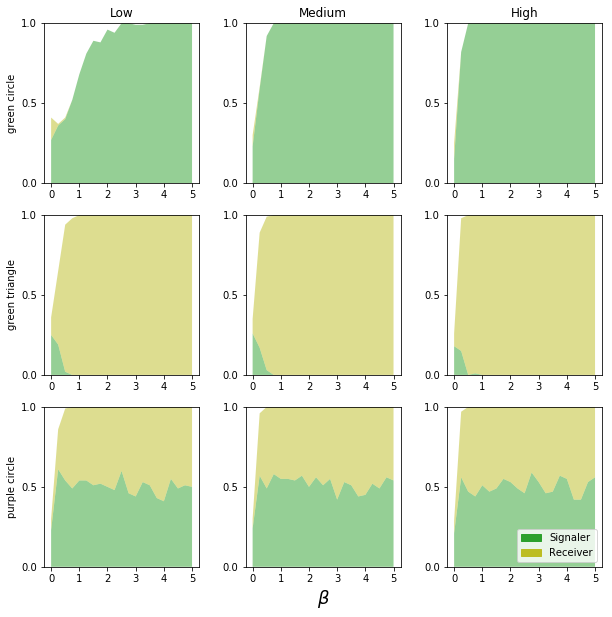

In [41]:
fig = plt.figure(figsize=figureSize)
numRows = dataFrameRowLength
numColumns = dataFrameColLength
plotCounter = 1

for target, grp in dataframeName.groupby('trueTarget'):
    grp.index = grp.index.droplevel('trueTarget')
    for cost, group in grp.groupby('costs'):
    
        #subplot axis labels
        axForDraw = fig.add_subplot(numRows, numColumns, plotCounter)
        if plotCounter % numColumns == 1:
            axForDraw.set_ylabel(target)
            #axForDraw.set_ylabel('alpha: {}'.format(round(alpha, 2)))
        if plotCounter <= numColumns:
            axForDraw.set_title(cost)
        axForDraw.set_ylim(0, 1)

        #draw subplot
        drawPerformanceStackPlot(group, cost, axForDraw)
        if plotCounter == 8:
            plt.xlabel(r'$\beta$', fontsize=18)
        plotCounter += 1

#Title
plt.suptitle('')

#legend
legend_dict = legendColors
patchList = []
for key in legend_dict:
    data_key = mpatches.Patch(color=legend_dict[key], label=key)
    patchList.append(data_key)
plt.legend(handles=patchList, loc='lower right')

#adjust horizontal spacing of subplots
fig.subplots_adjust(wspace=horizontalSpaceBetweenSubplots)

#plt.show()
plt.savefig('noJPnoRR_plots.png')

In [ ]:
#tmp.to_pickle("./jointPlanningNORecursiveReasoning.pkl")